# First session - To solve the first two tasks of the proposed project

To start we should load the pandas packages as pd along with the matplotlib.pyplot as we want to take a look on the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# First task (to group the modules' files into a single one for each module)

 We want to load the data into our workspace. To do so, we are going to use the **pd.read_csv** function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). This is a very powerful function that will read most types of data files into a dataframe, **the big exception is .xlsx files**. Take a look on the documentation of the function for more info and feel free to ask me questions.

**For the MOD modules** The data from modules named "mod1.txt" or "mod2.txt" should follow a certain nomenclature in which the columns should be named: "Time", "RH", "Temperature", "TGS4161", "MICS2714", "TGS2442", "MICS5524", "TGS2602", "TGS2620". The separator of columns of these files is a '\t'. So, a suggestion of code to read these files is presented below:

In [3]:
def combiner_fichiers_mod(base_path, mod_name):
    columns = ["Time", "RH", "Temperature", "TGS4161", "MICS2714", "TGS2442", "MICS5524", "TGS2602", "TGS2620"]
    all_data = []

    for i in range(1, 9):
        file_path = f"{base_path}/part{i}/{mod_name}.txt"
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep='\t', header=None, names=columns)
            all_data.append(df)

    mod_data = pd.concat(all_data, ignore_index=True)
    return mod_data


In [4]:
def preparer_et_sauvegarder(mod_data, output_path):
    mod_data['Time'] = pd.to_datetime(mod_data['Time']).dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')

    mod_data = mod_data.drop_duplicates()

    mod_data.to_csv(output_path, index=False, sep='\t')


There are 8 parts for each "mod", so you should group all the 8 parts of each module into a single one (tip: pd.concat() function) and **save it in a .txt file**. Namely, one file representative of the data in "mod1" and another representative of the data in "mod2" (see pd.to_csv()). **The files must have the columns names!**
Don't forget to convert the data in the "Time" column into a **datetime** format and put them in the **correct timezone ("UTC+01:00")**. You can use the following piece of code to do that:

In [5]:
base_path = "/content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Libelium New"
output_mod1 = "/content/drive/MyDrive/TP DS mars/mod1_final.txt"
output_mod2 = "/content/drive/MyDrive/TP DS mars/mod2_final.txt"

mod1_data = combiner_fichiers_mod(base_path, "mod1")
mod2_data = combiner_fichiers_mod(base_path, "mod2")

preparer_et_sauvegarder(mod1_data, output_mod1)
preparer_et_sauvegarder(mod2_data, output_mod2)

print(mod1_data.shape)
print(mod2_data.shape)


<ipython-input-4-9a98684c4d9c>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mod_data['Time'] = pd.to_datetime(mod_data['Time']).dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
<ipython-input-4-9a98684c4d9c>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mod_data['Time'] = pd.to_datetime(mod_data['Time']).dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')


(1771518, 9)
(1748604, 9)


**And drop the duplicates!**

**For the POD modules** There are three sets of data in the folders named "14_nov-22_nov-Pods", "23_nov-12_nov-Pods" and "fevrier_mars_pods". Three files are present in each folder, each correspondent to one exemplar of the module. Again, you should group the data present in the folders (**pd.concat()**) and save it as a single one for each POD this time as a .csv file (see pd.to_csv()).  Namely, one for POD 200085, one for POD 200086 and one for POD 200088. **For these files the column separator is a ';'**. **The saved files must have the columns names!**

You don't need to name the columns of the dataframes resulting from importing the POD data. However, the column related to time is called "date" in these files, **so it is highly suggested to rename this column** to the same name as the one in the "mod" modules, i.e., 'Time'.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

There are a few unnecessary rows in the dataframe, so delete any row that doesn't represent data. **You should also delete the columns named 'element', 'aqi' and 'Unnamed'**. You can use the skiprows parameter of the pd.read_csv function. Here's suggestion of code for loading POD data:

In [16]:
import pandas as pd
import os

def lire_et_combiner_pod(base_path, pod_number):
    date_folders = ["14_nov-22_nov-Pods", "23_nov-12_dec-Pods", "fevrier_mars_2023_pods"]
    all_data = []

    for folder in date_folders:
        file_path = os.path.join(base_path, folder, f"POD {pod_number}.csv")
        print(f"Tentative de lecture de : {file_path}")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep=';', skiprows=(1,2,3,4))
            df.rename(columns={'date': 'Time'}, inplace=True)
            df['Time'] = pd.to_datetime(df['Time'])
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
            df.drop(columns=['element', 'aqi'], errors='ignore', inplace=True)
            all_data.append(df)

    if all_data:
        full_data = pd.concat(all_data, ignore_index=True)
        full_data.dropna(subset=['Time'], inplace=True)
        return full_data
    else:
        print(f"Aucune donnée trouvée pour POD {pod_number}.")
        return pd.DataFrame()

base_path = '/content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs'

pod_200085_data = lire_et_combiner_pod(base_path, '200085')
pod_200086_data = lire_et_combiner_pod(base_path, '200086')
pod_200088_data = lire_et_combiner_pod(base_path, '200088')

print(pod_200085_data.shape)
print(pod_200086_data.shape)
print(pod_200088_data.shape)


Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/14_nov-22_nov-Pods/POD 200085.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/23_nov-12_dec-Pods/POD 200085.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/fevrier_mars_2023_pods/POD 200085.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/14_nov-22_nov-Pods/POD 200086.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/23_nov-12_dec-Pods/POD 200086.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/fevrier_mars_2023_pods/POD 200086.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/14_nov-22_nov-Pods/POD 200088.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/PODs/23_nov-12_dec-Pods/POD 200088.csv
Tentative de lecture de : /content/drive

**For the PICO module** They have the same characteristics as the POD modules, as it has useless rows in the beginning, the time columns must be renamed, the separator is a ';', so the code used to load POD should work well here, with the proper changes to the file path. The difference arises from the column names, here you should delete any column that contains 'aqi' or 'qai' or 'iaq', as well as the columns name 'element' and 'Unnamed'.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

Remember to group the data from the files into a single one and save it as a .csv (see pd.to_csv()). **The saved files must have the columns names!**

**For the Piano THICK and THIN modules** They have the same characteristics as the previous two modules. Here, you only need to delete the 'element' column.

**Rename the 'date' column to 'Time', and to convert it to a datetime format, using pd.to_datetime()**

Remember to group the data from the files into a single one referent to Piano THICK and Piano THIN and save it as a .csv (see pd.to_csv()). **The saved files must have the columns names!**

In [17]:
def lire_et_combiner_piano(base_path, module_name):
    date_folders = ["14_nov-22_nov-Piano", "23_nov-12_dec-Piano", "fevrier_mars_2023_piano"]
    all_data = []

    for folder in date_folders:
        file_path = os.path.join(base_path, folder, f"IMT_{module_name}.csv")
        print(f"Tentative de lecture de : {file_path}")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep=';', skiprows=(1,2,3,4))
            if 'date' in df.columns:
                df.rename(columns={'date': 'Time'}, inplace=True)
            df['Time'] = pd.to_datetime(df['Time'])
            cols_to_drop = ['element'] + [col for col in df.columns if 'Unnamed' in col or 'aqi' in col or 'qai' in col or 'iaq' in col]
            df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
            all_data.append(df)
        else:
            print(f"Fichier non trouvé : {file_path}")

    if all_data:
        full_data = pd.concat(all_data, ignore_index=True)
        return full_data
    else:
        print(f"Aucune donnée trouvée pour le module {module_name}.")
        return pd.DataFrame()

base_path = '/content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano'

piano_pico_data = lire_et_combiner_piano(base_path, 'PICO')
piano_thick_data = lire_et_combiner_piano(base_path, 'Thick')
piano_thin_data = lire_et_combiner_piano(base_path, 'Thin')

print(piano_pico_data.shape)
print(piano_thick_data.shape)
print(piano_thin_data.shape)


Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/14_nov-22_nov-Piano/IMT_PICO.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/23_nov-12_dec-Piano/IMT_PICO.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/fevrier_mars_2023_piano/IMT_PICO.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/14_nov-22_nov-Piano/IMT_Thick.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/23_nov-12_dec-Piano/IMT_Thick.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/fevrier_mars_2023_piano/IMT_Thick.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/14_nov-22_nov-Piano/IMT_Thin.csv
Tentative de lecture de : /content/drive/MyDrive/TP DS mars/TP Data 2024 - FISA/Piano/23_nov-12_dec-Piano/IMT_Thin.csv
Tentative de lecture de : /content/dr

At the end of this task: **mod1** should have 1771518 rows and 9 columns; **mod2** should have 1748604 rows and 9 columns; **PODs** should have around 617035 rows and 12 columns, and the Piano modules should have 617034 rows **(thick with 10 columns, thin with 11 columns and pico with 11 columns)**, small variations on the number of rows are accepted (+- 10 samples).

If everything goes well, by running the code below (by adapting the variable names to yours) you should get something similar to this picture: 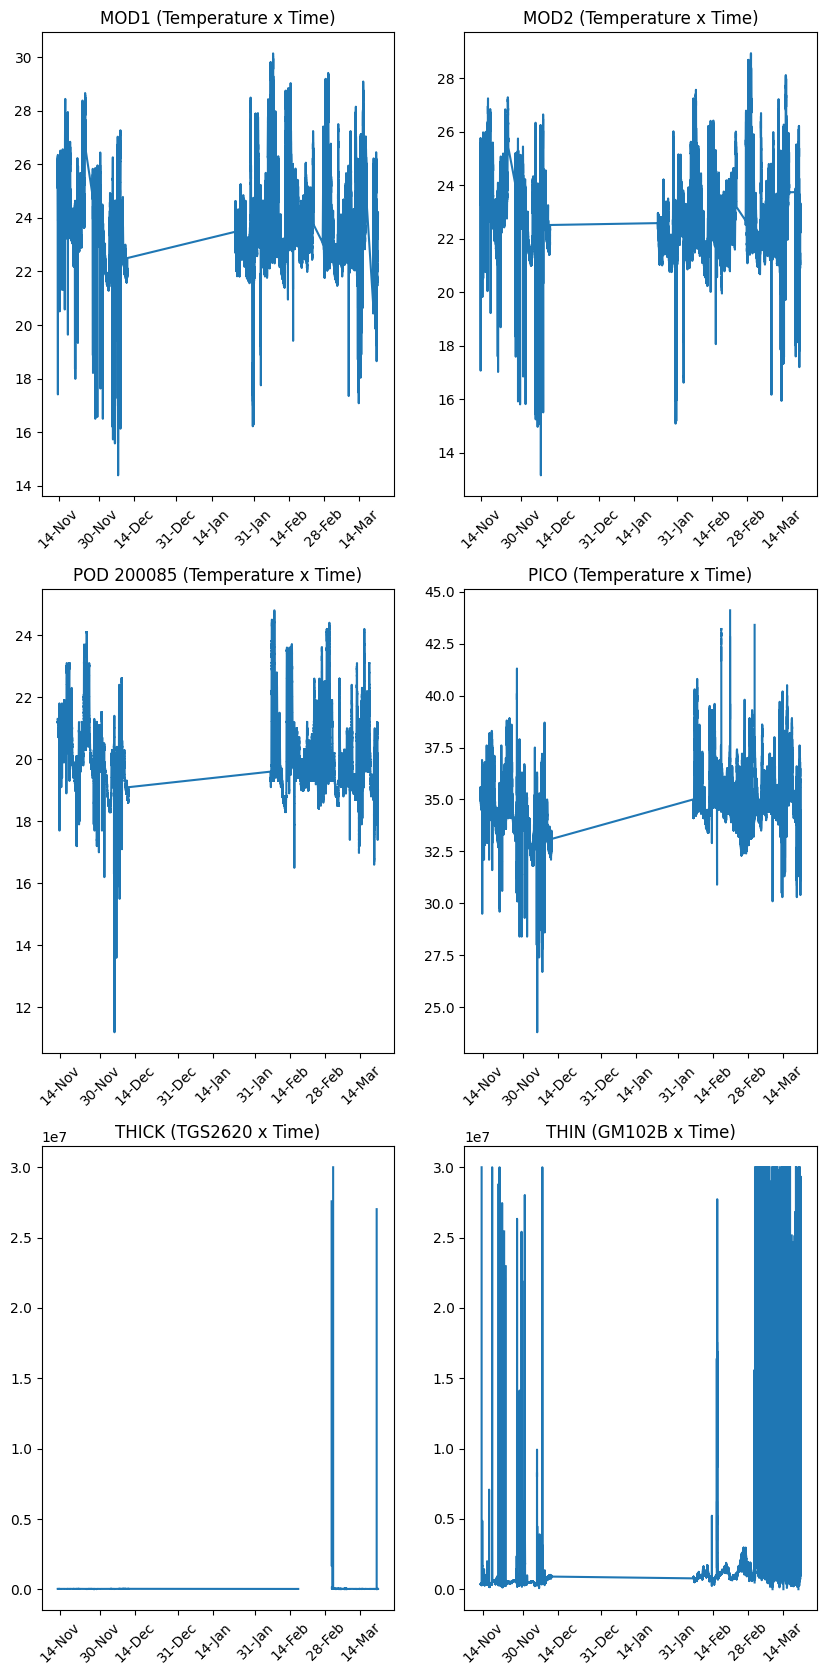


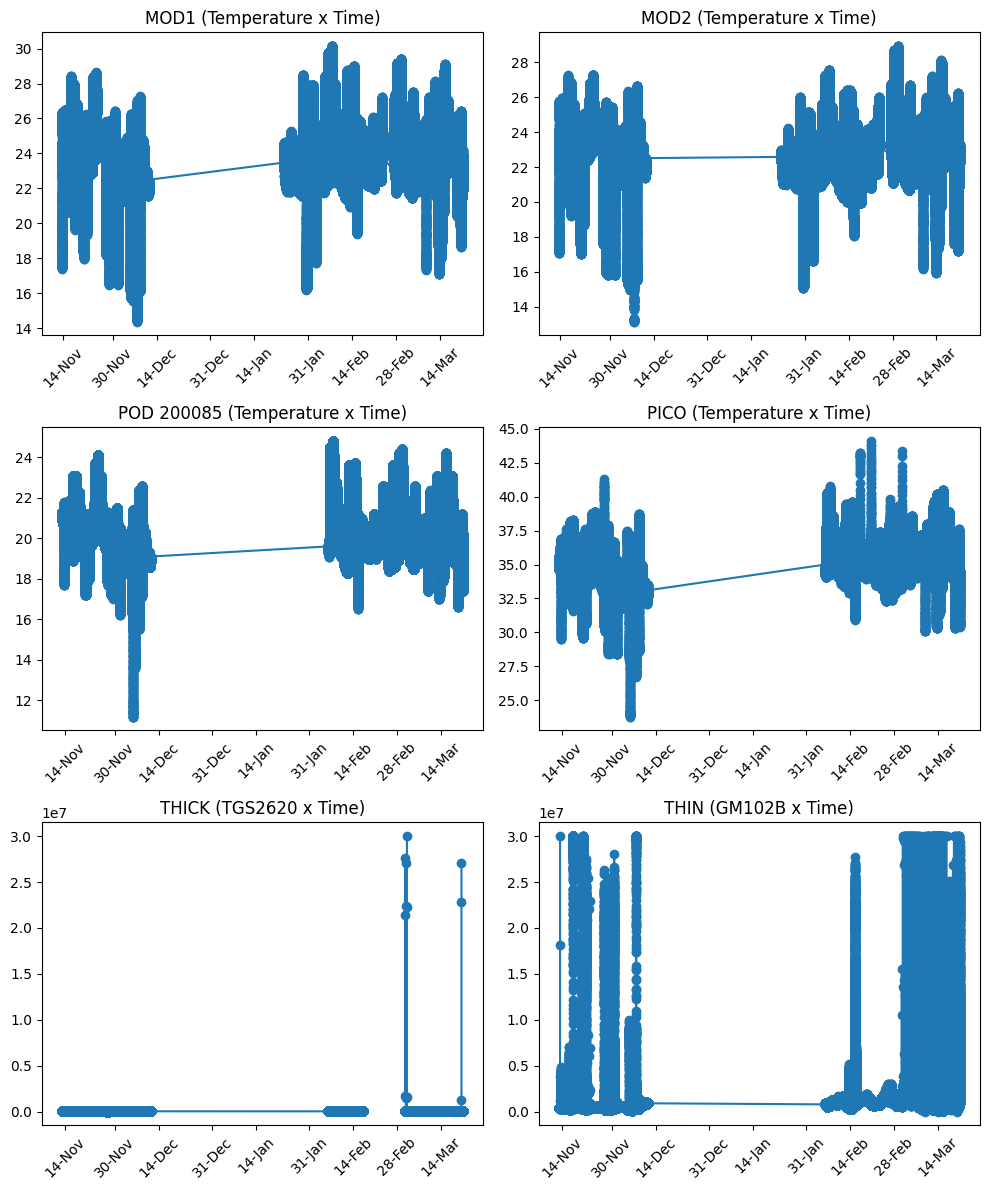

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 12))  # Augmentation de la taille pour une meilleure lisibilité
date_format = mdates.DateFormatter('%d-%b')

plt.subplot(3, 2, 1)  # MOD1
plt.title("MOD1 (Temperature x Time)")
plt.plot(mod1_data['Time'], mod1_data['Temperature'], marker='o', linestyle='-')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)  # MOD2
plt.title("MOD2 (Temperature x Time)")
plt.plot(mod2_data['Time'], mod2_data['Temperature'], marker='o', linestyle='-')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)  # POD 200085
plt.title("POD 200085 (Temperature x Time)")
plt.plot(pod_200085_data['Time'], pod_200085_data['temperature'], marker='o', linestyle='-')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)  # Piano PICO
plt.title("PICO (Temperature x Time)")
plt.plot(piano_pico_data['Time'], piano_pico_data['bme68x_temp'], marker='o', linestyle='-')  # Replace 'Temperature' with actual temperature column name if different
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)  # Piano THICK
plt.title("THICK (TGS2620 x Time)")
plt.plot(piano_thick_data['Time'], piano_thick_data['piano_TGS2620I00'], marker='o', linestyle='-')  # Replace 'TGS2620' with actual column name if different
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)  # Piano THIN
plt.title("THIN (GM102B x Time)")
plt.plot(piano_thin_data['Time'], piano_thin_data['piano_GM102BI00'], marker='o', linestyle='-')  # Replace 'GM102B' with actual column name if different
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


# Second task (to sync the modules)

The data from the Piano modules and the PODs are trivial to synchronize (**look-up the pd.merge() function**: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge) as they all have the same sampling time. The tricky part is to sync *mod1* and *mod2* with the rest of the modules, mainly because of the 4 seconds sampling time. The requirement for the task is to average the *mod* samples in between the PODs and Piano samples, this is simpler than it looks. You can round the time vector of mod modules using the command:

In [22]:


datasets = [mod1_data, mod2_data, pod_200085_data, pod_200086_data, pod_200088_data, piano_pico_data, piano_thick_data, piano_thin_data]

for i, dataset in enumerate(datasets):
    dataset['Time'] = dataset['Time'].dt.round('10s')
    datasets[i] = dataset.groupby('Time').mean().reset_index()


merged_data = datasets[0]

merged_data = pd.merge(merged_data, datasets[1], on='Time', how='inner', suffixes=('_mod1', '_mod2'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[2], on='Time', how='inner', suffixes=('', '_200085'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[3], on='Time', how='inner', suffixes=('', '_200086'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[4], on='Time', how='inner', suffixes=('', '_200088'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[5], on='Time', how='inner', suffixes=('', '_pico'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[6], on='Time', how='inner', suffixes=('', '_thick'))
print(merged_data.shape)
merged_data = pd.merge(merged_data, datasets[7], on='Time', how='inner', suffixes=('', '_thin'))
print(merged_data.shape)

merged_data = merged_data.dropna(how='all')
merged_data = merged_data.drop_duplicates()

merged_data.to_csv('/content/drive/MyDrive/TP DS mars/final_merged_data.csv', index=False)

print("Fusion terminée et enregistrée.")
print(merged_data.shape)


(646031, 17)
(524517, 28)
(524516, 39)
(524516, 50)
(524516, 60)
(524516, 69)
(524516, 79)
Fusion terminée et enregistrée.
(524516, 79)


# Nouvelle section

Then, you can group the dataframe by samples with the same time vector and calculate the mean between them. Look-up groupby() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas-dataframe-groupby) and try to make it work.

After you have a new dataframe with the correct sampling time, you can merge all dataframes using the function pd.merge() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge) and use the 'Time' columns as the reference for the merge. The final dataframe should have a suffix in the columns showing from which module the column came from in the form '_module' (look-up the *suffixes* parameter of the pd.merge() function).

**If everything goes well, the final dataframe should have 79 columns and between 400k and 700k rows (depending on the order of the merge). This resulting dataframe should be saved as .csv to be used in the following tasks**